In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving economic_index.csv to economic_index.csv


In [ ]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
#drop unnemcessary column
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
#inplace updates the dataframe
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
#check none values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


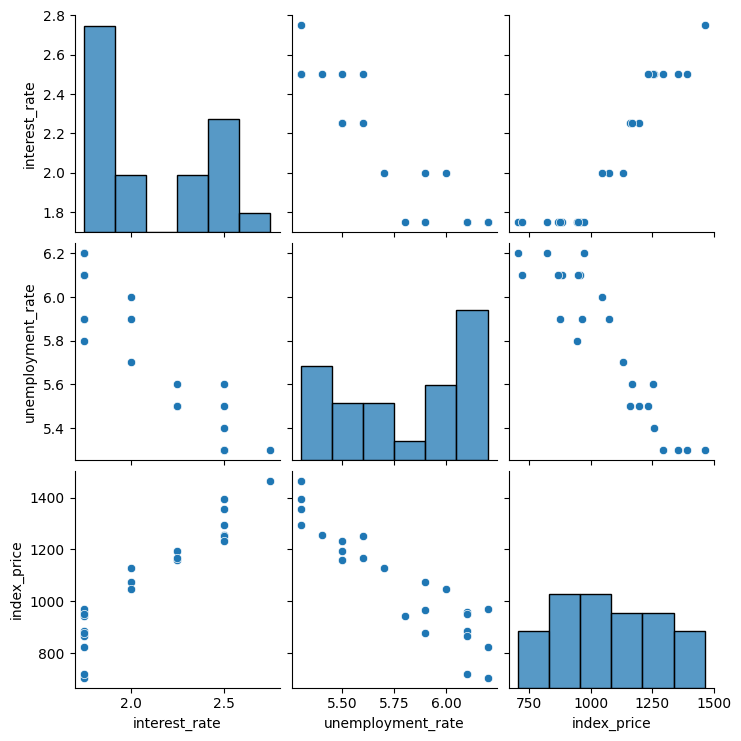

In [ ]:
#visualisation
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

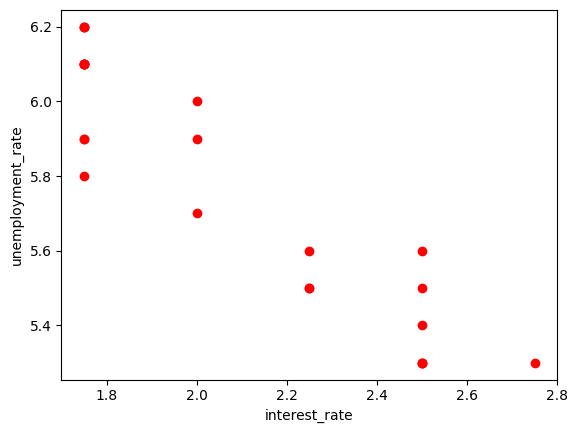

In [ ]:
#visualize data more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')


In [ ]:
#independent and dependent feature
x=df[['interest_rate','unemployment_rate']] #or df.iloc[:,:,-1]
y=df['index_price'] ##or df.iloc[:,-1]

In [ ]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [ ]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

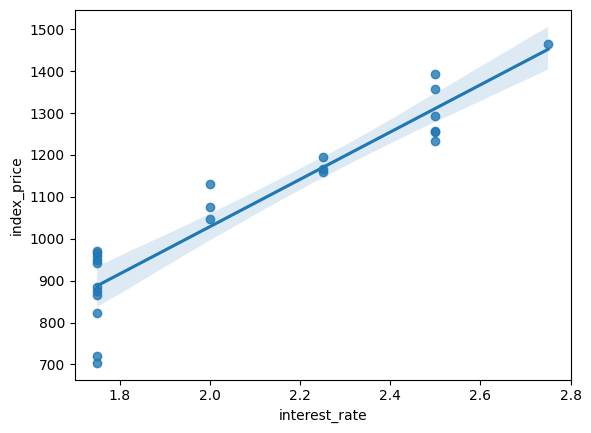

In [ ]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

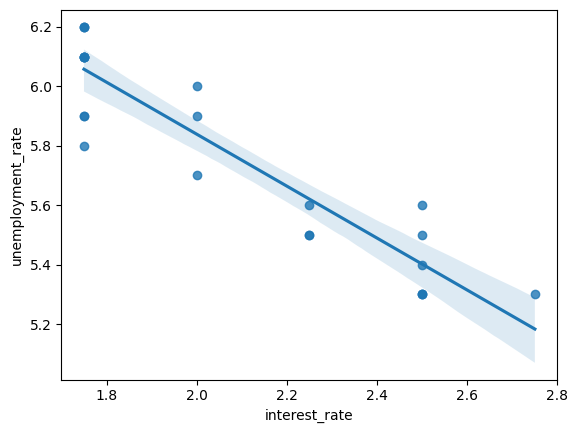

In [ ]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

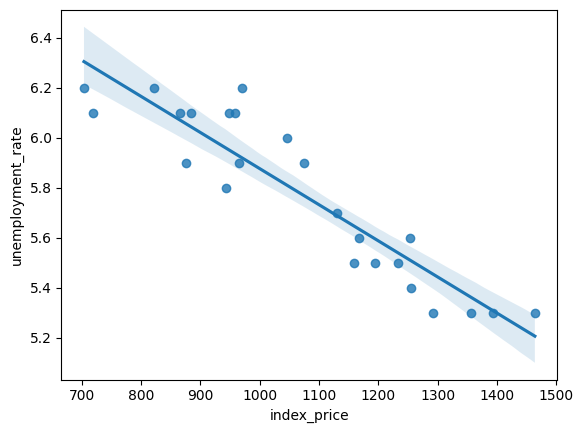

In [ ]:
sns.regplot(y=df['unemployment_rate'],x=df['index_price'])

In [ ]:
#standardization
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train


array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
#applying simple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
#cross valodation score
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [ ]:
np.mean(validation_score)

np.float64(-5914.828180162392)

In [ ]:
#prediction for test data
y_pred=regression.predict(x_test)

In [ ]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
##performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse)
print(mae)
print(rmse)
print(score)
#display the adjusted rsqr
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

5793.76288771258
59.93578152323554
76.11677139574813
0.8278978091457142


0.713163015242857

#assumptions


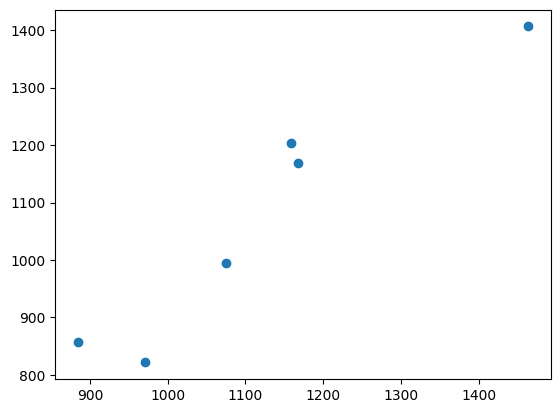

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


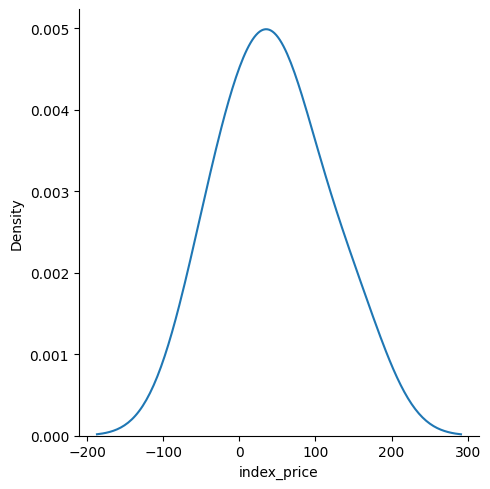

In [ ]:
#plot this residual
sns.displot(residuals,kind='kde')

kde= kernel density estimate and this type of cueve shows our model is good


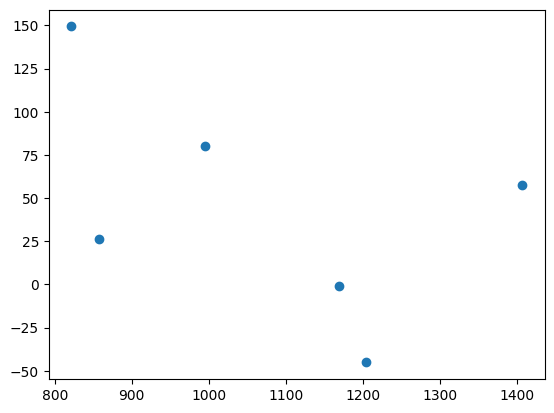

In [ ]:
#scatter plot with respect to pred and residuals
plt.scatter(y_pred,residuals)

In [ ]:
##OLS technique
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 25 May 2025   Prob (F-statistic):                       0.754
Time:                        20:48:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
print("Coefficient or slope:",regression.coef_ )  #B1
print("Intercept:",regression.intercept_ )

Coefficient or slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443
